# US Accidents severity prediction

In [10]:
import collections
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn import ensemble
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [11]:
warnings.filterwarnings('ignore')
%matplotlib inline

## Read dataset

In [12]:
# Download dataset from here: https://www.kaggle.com/sobhanmoosavi/us-accidents/version/10
data_raw = pd.read_csv("US_Accidents_Dec20_updated.csv")

In [13]:
collections.Counter(data_raw["State"])

Counter({'OH': 22044,
         'IN': 11736,
         'KY': 5671,
         'WV': 3242,
         'MI': 27775,
         'PA': 42844,
         'CA': 448833,
         'NV': 3681,
         'MN': 52345,
         'TX': 75142,
         'MO': 16949,
         'CO': 19809,
         'OK': 5592,
         'LA': 19250,
         'KS': 5146,
         'WI': 7919,
         'IA': 4780,
         'MS': 2790,
         'NE': 2178,
         'ND': 455,
         'WY': 330,
         'SD': 213,
         'MT': 3306,
         'NM': 1467,
         'AR': 4373,
         'IL': 41709,
         'NJ': 29850,
         'GA': 31111,
         'FL': 153007,
         'NY': 60974,
         'CT': 15194,
         'RI': 3766,
         'SC': 28090,
         'NC': 50159,
         'MD': 35320,
         'MA': 6121,
         'TN': 21874,
         'VA': 51198,
         'DE': 2331,
         'DC': 3788,
         'ME': 2202,
         'AL': 9375,
         'NH': 3826,
         'VT': 352,
         'AZ': 30185,
         'UT': 33218,
         'ID'

## Select data from dataset to analyze

Поскольку датасет достаточно большой, будем использовать данные только для одного штата - NJ. Всего 29850 записей.

In [14]:
data_in = data_raw[data_raw["State"] == "NJ"]
del data_raw  # Full dataset is too big to store it in memory all the time

In [15]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data_in.head())

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
32539,A-2749139,2,2016-11-30 15:46:50,2016-11-30 21:46:50,40.556540,-74.319450,40.55267,-74.31729,0.290,At US-1/Exit 130 - Accident.,NaN,Garden State Pkwy S,R,Metuchen,Middlesex,NJ,08840,US,US/Eastern,KLDJ,2016-11-30 15:55:00,54.1,NaN,95.0,29.80,4.0,East,9.2,0.12,Drizzle,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
32562,A-2749162,2,2016-11-30 16:29:48,2016-11-30 22:29:48,39.825870,-75.104100,39.83091,-75.10366,0.349,At Deptford Center Rd/Exit 58 - Accident.,NaN,NJ-55 N,R,Woodbury,Gloucester,NJ,08096,US,US/Eastern,KPHL,2016-11-30 16:19:00,60.1,NaN,96.0,29.73,2.5,East,5.8,0.00,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
32564,A-2749164,2,2016-11-30 16:19:48,2016-11-30 22:19:48,40.251096,-74.697222,40.24650,-74.69967,0.343,At Sloan Ave/Exit 65 - Accident.,NaN,Sloan Ave,R,Trenton,Mercer,NJ,08619,US,US/Eastern,KTTN,2016-11-30 15:53:00,55.0,NaN,93.0,29.75,6.0,Variable,5.8,0.01,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
32581,A-2749181,2,2016-11-30 17:19:53,2016-11-30 23:19:53,40.901270,-74.139330,40.90142,-74.13597,0.176,Ramp to RT-20 and I-80 Westbound - Accident.,NaN,I-80 W,R,Paterson,Passaic,NJ,07503,US,US/Eastern,KTEB,2016-11-30 17:08:00,54.0,NaN,90.0,29.78,4.0,East,12.7,0.00,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
32583,A-2749183,2,2016-11-30 17:19:53,2016-11-30 23:19:53,40.900610,-74.134400,40.90190,-74.13489,0.093,Ramp to CR-624/Market St/Exit 59 - Accident.,NaN,McLean Blvd,R,Paterson,Passaic,NJ,07503,US,US/Eastern,KTEB,2016-11-30 17:08:00,54.0,NaN,90.0,29.78,4.0,East,12.7,0.00,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


In [16]:
data_in.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,29850.000000,29850.000000,29850.000000,29850.000000,29850.000000,29850.000000,6733.000000,29198.000000,19611.000000,29085.000000,29379.000000,29103.000000,26948.000000,18563.000000
mean,2.402580,40.453271,-74.423022,40.453347,-74.422487,0.612133,1056.090599,55.234602,48.127566,66.176758,29.980243,8.779192,8.416706,0.023794
std,0.711375,0.428212,0.368127,0.428263,0.369169,1.038655,1336.125836,16.988278,18.995318,21.503492,0.267620,2.652225,5.594810,0.338576
min,1.000000,38.961630,-75.547528,38.960470,-75.548913,0.000000,1.000000,1.000000,-14.000000,9.000000,28.730000,0.100000,0.000000,0.000000
25%,2.000000,40.097385,-74.697350,40.097310,-74.698504,0.043000,188.000000,42.100000,34.000000,49.000000,29.820000,10.000000,5.000000,0.000000
50%,2.000000,40.638440,-74.287763,40.638676,-74.287148,0.278000,586.000000,54.000000,46.000000,66.000000,30.000000,10.000000,8.000000,0.000000
75%,3.000000,40.776180,-74.135735,40.775500,-74.135510,0.718750,1400.000000,69.000000,63.000000,86.000000,30.160000,10.000000,11.500000,0.000000
max,4.000000,41.351149,-73.912430,41.351149,-73.911850,21.712000,19098.000000,97.000000,97.000000,100.000000,30.840000,20.000000,169.000000,10.000000


## Columns description

| Column                | Описание                                                         |
| --------------------- | ----------------------------------------------------------------- |
| ID                    | Уникальный ID происшествия                                        |
| Severity              | Степень серьезности происшествия                                  |
| Start_Time            | Время начала происшествия (местное)                               |
| End_Time              | Время завершения происшествия (местное)                           |
| Start_Lat             | Широта в GPS координате в начальной точке происшествия            |
| Start_Lng             | Долгота в GPS координате в начальной точке происшествия           |
| End_Lat               | Широта в GPS координате в конечной точке происшествия             |
| End_Lng               | Долгота в GPS координате в конечной точке происшествия            |
| Distance(mi)          | Длина дорожного полотна, участвующего в аварии                    |
| Description           | Описание дорожного происшествия на естественном языке             |
| Number                | Номер улицы                                                       |
| Street                | Имя улицы                                                         |
| Side                  | Сторона улицы, где произошла авария                               |
| City                  | Город                                                             |
| County                | Округ                                                             |
| State                 | Штат                                                              |
| Zipcode               | Почтовый индекс                                                   |
| Country               | Страна                                                            |
| Timezone              | Часовой пояс                                                      |
| Airport_Code          | Код ближайшего аэропорта                                          |
| Weather_Timestamp     | Временная отметка, когда было произведено измерение данных погоды |
| Temperature(F)        | Температура (в Фаренгейтах)                                       |
| Wind_Chill(F)         | Ветро-холодовой индекс (в Фаренгейтах)                            |
| Humidity(%)           | Влажность (в процентах)                                           |
| Pressure(in)          | Давление (в дюймах)                                               |
| Visibility(mi)        | Видимость (в милях)                                               |
| Wind_Direction        | Направление ветра                                                 |
| Wind_Speed(mph)       | Скорость ветра (в милях в час)                                    |
| Precipitation(in)     | Атмосферные осадки (в дюймах)                                     |
| Weather_Condition     | Погодные условия                                                  |
| Amenity               | Наличие удобств                                                   |
| Bump                  | Наличие лежачего полицейского/искусственных неровностей           |
| Crossing              | Наличие пересечения догор                                         |
| Give_Way              | Наличие знака "Уступи дорогу"                                     |
| Junction              | Наличие перекрестка                                               |
| No_Exit               | Наличие тупиков                                                   |
| Railway               | Наличие железной дороги                                           |
| Roundabout            | Наличие круговой развязки                                         |
| Station               | Наличие ж/д станции                                               |
| Stop                  | Наличие знака "STOP"                                              |
| Traffic_Calming       | Наличие средств для замедления дорожного трафика                  |
| Traffic_Signal        | Наличие светофора                                                 |
| Turning_Loop          | Наличие разворота                                                 |
| Sunrise_Sunset        | День или ночь относительно времен рассвета и заката               |
| Civil_Twilight        | День или ночь относительно гражданских сумерек                    |
| Nautical_Twilight     | День или ночь относительно навигационных сумерек                  |
| Astronomical_Twilight | День или ночь относительно астрономеческих сумерек                |


## Data visualization

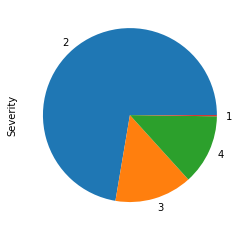

In [17]:
data_in["Severity"].value_counts().plot.pie();

Таким образом, выборка является несбалансированной. Большая часть дорожных происшествий относятся к серезности 2 из 4.

### Correlation matrix for numerical values

In [18]:
numerical_columns = [c for c in data_in.columns if data_in[c].dtype.name == 'float64']
data_numerical = data_in[numerical_columns]
corr_matrix = data_numerical.corr()
corr_matrix

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
Start_Lat,1.000000,0.719716,0.999592,0.719625,-0.086685,-0.199341,-0.044440,-0.035223,-0.039735,0.002361,-0.017010,-0.065861,0.018061
Start_Lng,0.719716,1.000000,0.719340,0.999026,-0.074920,-0.187873,0.006185,0.013494,-0.040946,0.032763,0.008256,-0.005321,0.027320
End_Lat,0.999592,0.719340,1.000000,0.719781,-0.087528,-0.199713,-0.044039,-0.034706,-0.039933,0.002658,-0.016613,-0.065607,0.018092
End_Lng,0.719625,0.999026,0.719781,1.000000,-0.076159,-0.187263,0.006727,0.013920,-0.041748,0.033208,0.009491,-0.005154,0.027148
Distance(mi),-0.086685,-0.074920,-0.087528,-0.076159,1.000000,0.020746,-0.001560,0.014300,0.075768,-0.007628,-0.010432,-0.003503,-0.012629
Number,-0.199341,-0.187873,-0.199713,-0.187263,0.020746,1.000000,-0.005880,-0.021026,0.010863,-0.029566,-0.002615,-0.018082,-0.018357
Temperature(F),-0.044440,0.006185,-0.044039,0.006727,-0.001560,-0.005880,1.000000,0.989889,-0.144948,-0.163524,0.153991,-0.026915,-0.003017
Wind_Chill(F),-0.035223,0.013494,-0.034706,0.013920,0.014300,-0.021026,0.989889,1.000000,-0.043637,-0.206794,0.125977,-0.159772,-0.029003
Humidity(%),-0.039735,-0.040946,-0.039933,-0.041748,0.075768,0.010863,-0.144948,-0.043637,1.000000,-0.255687,-0.558400,-0.261446,0.037183
Pressure(in),0.002361,0.032763,0.002658,0.033208,-0.007628,-0.029566,-0.163524,-0.206794,-0.255687,1.000000,0.269002,-0.177476,0.027153


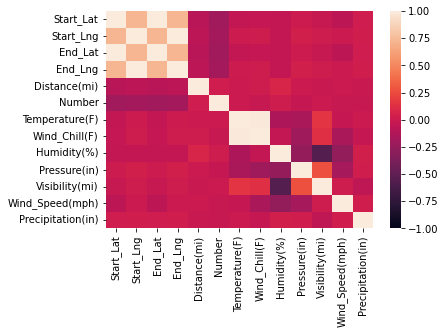

In [19]:
sns.heatmap(corr_matrix, vmin=-1, vmax=1);

Корреляция Start_Lat и End_Lat (Start_Lng и End_Lng) близка к 1, также как и Temperature и Wind_Chill.
Также есть заметная зависимость между Start_Lat и Start_Lng (End_Lat и End_Lng).
Видна заметная обратная корреляция между влажностью и видимостью (-0.56)

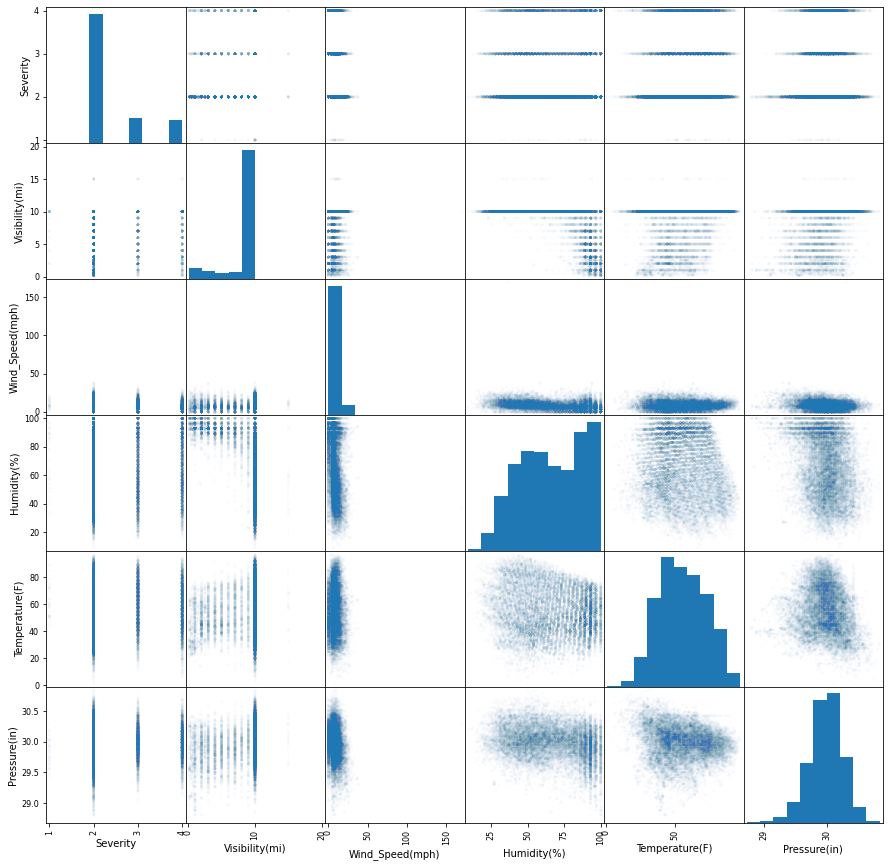

In [20]:
scatter_cols = [
    'Severity',
    'Visibility(mi)',
    'Wind_Speed(mph)',
    'Humidity(%)',
    'Temperature(F)',
    'Pressure(in)',
]
scatter_data = data_in[scatter_cols]
scatter_matrix(scatter_data, alpha=.01, figsize=(15, 15));

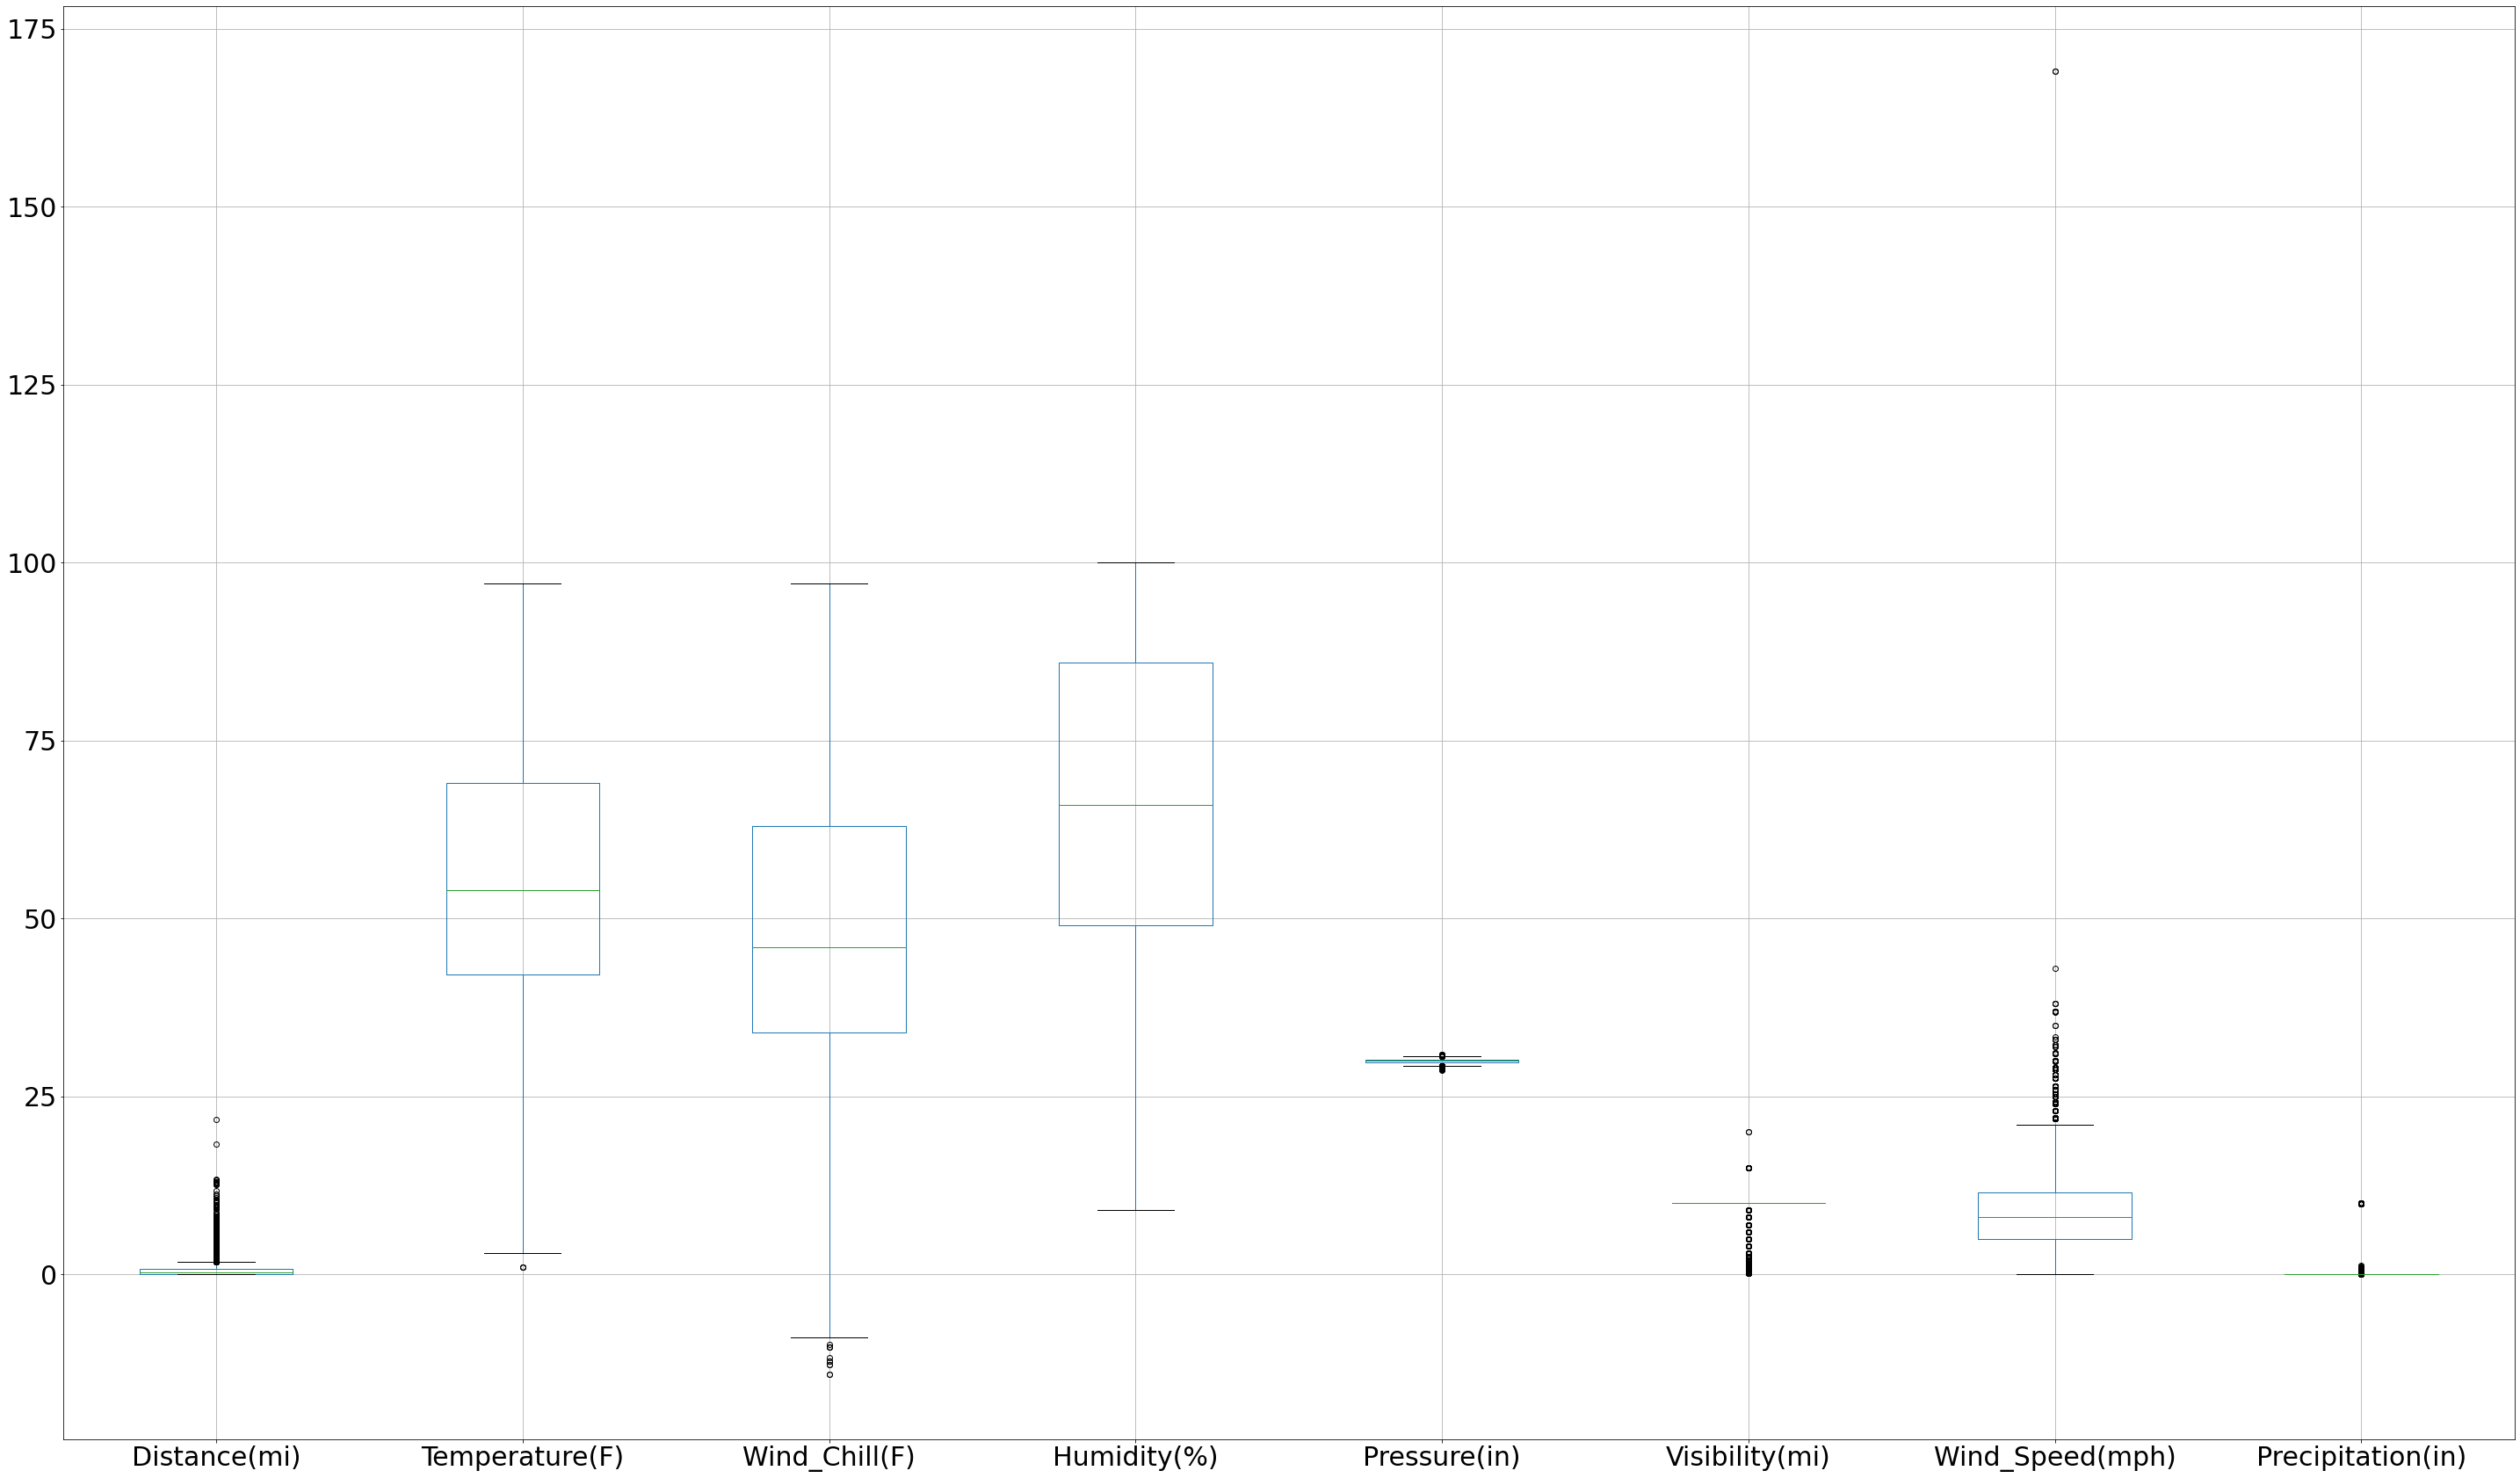

In [21]:
plt.figure(figsize=(50, 30))
data_numerical = data_numerical.drop(["Number"], axis=1)
data_for_boxplot = data_numerical.drop(["Start_Lat", "Start_Lng", "End_Lat", "End_Lng"], axis=1)
data_for_boxplot.boxplot(fontsize=30);

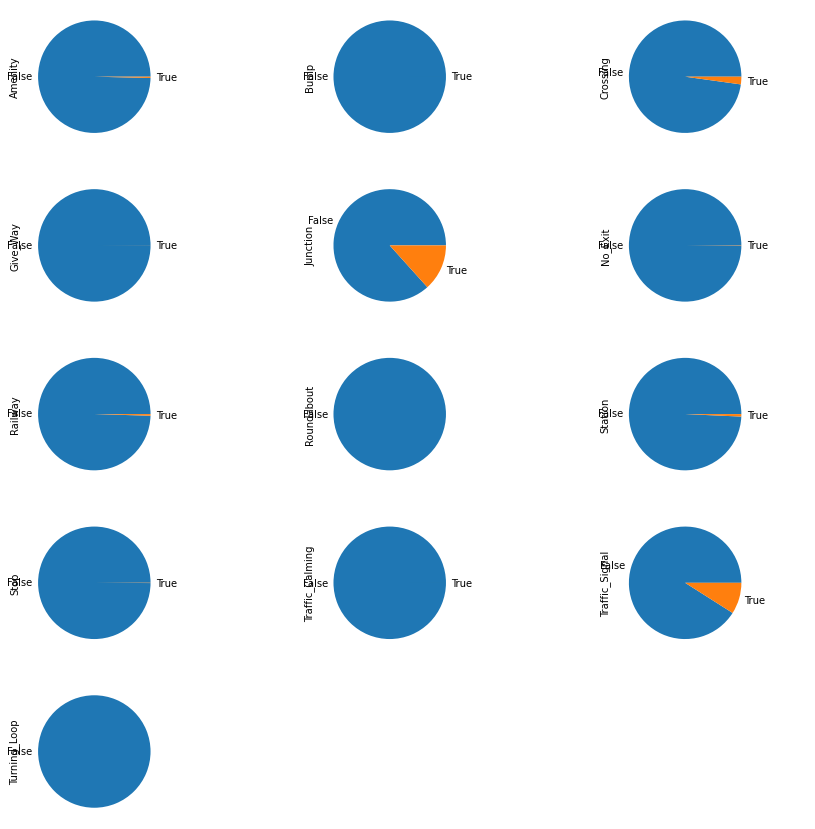

In [22]:
binary_columns = [c for c in data_in.columns if data_in[c].dtype.name == 'bool']
_, a = plt.subplots((len(binary_columns) + 2) // 3, 3, figsize=(15, 15))
for i, col in enumerate(binary_columns):
    data_in[col].value_counts().plot.pie(subplots=True, ax=a[i // 3, i % 3])
a[-1, -1].axis('off');
a[-1, -2].axis('off');

В основном бинарные характеристики все равны False, но заметно, что небольшая часть ДТП произошла рядом с перекрестком и в месте, где стоит светофор.

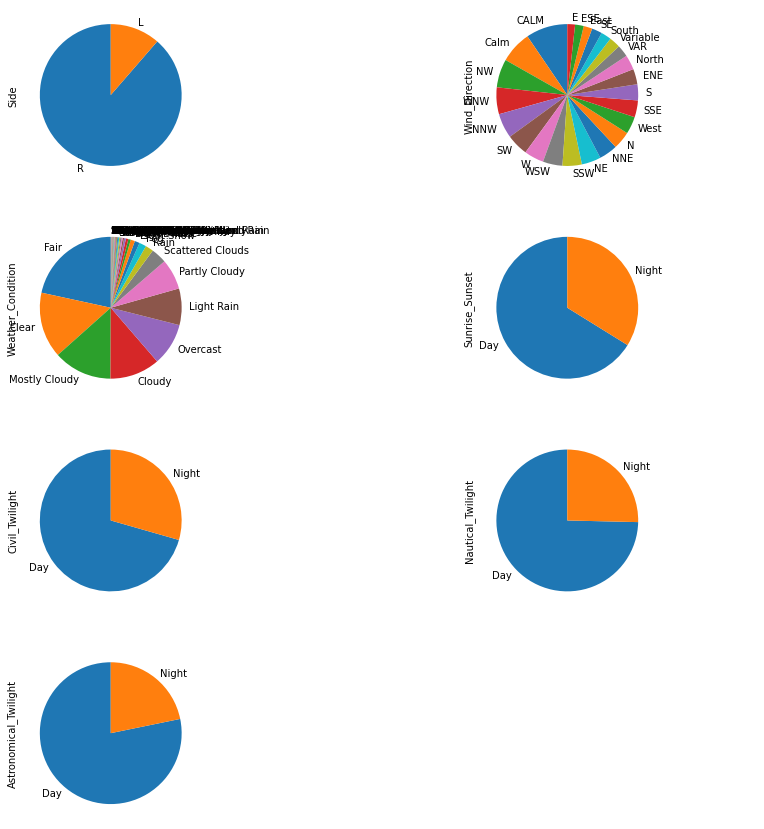

In [23]:
categorical_columns = [
    'Side',
    'Wind_Direction',
    'Weather_Condition',
    'Sunrise_Sunset',
    'Civil_Twilight',
    'Nautical_Twilight',
    'Astronomical_Twilight',
]
_, a = plt.subplots((len(categorical_columns) + 1) // 2, 2, figsize=(15, 15))
for i, col in enumerate(categorical_columns):
    data_in[col].value_counts().plot(kind='pie', subplots=True, ax=a[i // 2, i % 2], startangle=90)
a[-1, -1].axis('off');

Большая часть ДТП происходит днем, на правой стороне улицы, преимущественно, когда нет осадков, четкой зависимости от направления ветра нет.

## Missing values handling

In [24]:
numerical_columns = [c for c in data_in.columns if data_in[c].dtype.name == 'float64']
numerical_columns
data_numerical = data_in[numerical_columns]
data_numerical
data_numerical.isna().sum()

Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Number               23117
Temperature(F)         652
Wind_Chill(F)        10239
Humidity(%)            765
Pressure(in)           471
Visibility(mi)         747
Wind_Speed(mph)       2902
Precipitation(in)    11287
dtype: int64

В датасете имеются пропущенные значения

In [25]:
data_numerical = data_numerical.fillna(data_in.median(axis=0), axis=0)
data_numerical.isna().sum()

Start_Lat            0
Start_Lng            0
End_Lat              0
End_Lng              0
Distance(mi)         0
Number               0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
dtype: int64

In [26]:
data_in.update(data_numerical)

In [27]:
data_in.isna().sum()

ID                         0
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
End_Lat                    0
End_Lng                    0
Distance(mi)               0
Description                0
Number                     0
Street                     0
Side                       0
City                       0
County                     0
State                      0
Zipcode                    2
Country                    0
Timezone                   2
Airport_Code               2
Weather_Timestamp        404
Temperature(F)             0
Wind_Chill(F)              0
Humidity(%)                0
Pressure(in)               0
Visibility(mi)             0
Wind_Direction           625
Wind_Speed(mph)            0
Precipitation(in)          0
Weather_Condition        717
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction      

In [28]:
data_in = data_in.drop(["Weather_Timestamp"], axis=1)
data_in = data_in.dropna(axis = 0)

In [29]:
data_in.isna().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Number                   0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
S

## Binary columns

In [30]:
binary_columns = [c for c in data_in.columns if data_in[c].dtype.name == 'bool']
binary_columns

['Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop']

In [31]:
data_binary = data_in[binary_columns]
data_binary

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
32539,False,False,False,False,False,False,False,False,False,False,False,False,False
32562,False,False,False,False,False,False,False,False,False,False,False,False,False
32564,False,False,False,False,False,False,False,False,False,False,False,False,False
32581,False,False,False,False,False,False,False,False,False,False,False,False,False
32583,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515689,False,False,False,False,False,False,False,False,False,False,False,True,False
1515690,False,False,False,False,False,False,False,False,False,False,False,True,False
1515694,False,False,False,False,False,False,False,False,False,False,False,False,False
1515695,False,False,False,False,False,False,False,False,False,False,False,False,False


## Categorical columns

In [32]:
all_nonbinary_columns = [c for c in data_in.columns if data_in[c].dtype.name == 'object']
all_nonbinary_columns

['ID',
 'Start_Time',
 'End_Time',
 'Description',
 'Street',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Wind_Direction',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

Среди них выберем подходящие колонки

In [33]:
categorical_columns = [
    'Side',
    'Wind_Direction',
    'Weather_Condition',
    'Sunrise_Sunset',
    'Civil_Twilight',
    'Nautical_Twilight',
    'Astronomical_Twilight',
]

## Numerical columns

In [34]:
data_numerical = data_in[numerical_columns]
data_numerical

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
32539,40.556540,-74.319450,40.552670,-74.317290,0.290,586.0,54.1,46.0,95.0,29.80,4.0,9.2,0.12
32562,39.825870,-75.104100,39.830910,-75.103660,0.349,586.0,60.1,46.0,96.0,29.73,2.5,5.8,0.00
32564,40.251096,-74.697222,40.246500,-74.699670,0.343,586.0,55.0,46.0,93.0,29.75,6.0,5.8,0.01
32581,40.901270,-74.139330,40.901420,-74.135970,0.176,586.0,54.0,46.0,90.0,29.78,4.0,12.7,0.00
32583,40.900610,-74.134400,40.901900,-74.134890,0.093,586.0,54.0,46.0,90.0,29.78,4.0,12.7,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515689,39.812370,-74.985120,39.812370,-74.985120,0.000,296.0,69.0,69.0,84.0,29.94,10.0,3.0,0.00
1515690,39.812370,-74.985120,39.812370,-74.985120,0.000,296.0,69.0,69.0,84.0,29.94,10.0,3.0,0.00
1515694,40.691421,-74.105473,40.692769,-74.109832,0.247,586.0,74.0,74.0,62.0,29.98,10.0,8.0,0.00
1515695,40.467567,-74.437550,40.469359,-74.434152,0.217,586.0,69.0,69.0,75.0,29.89,10.0,0.0,0.00


### Drop anomalies

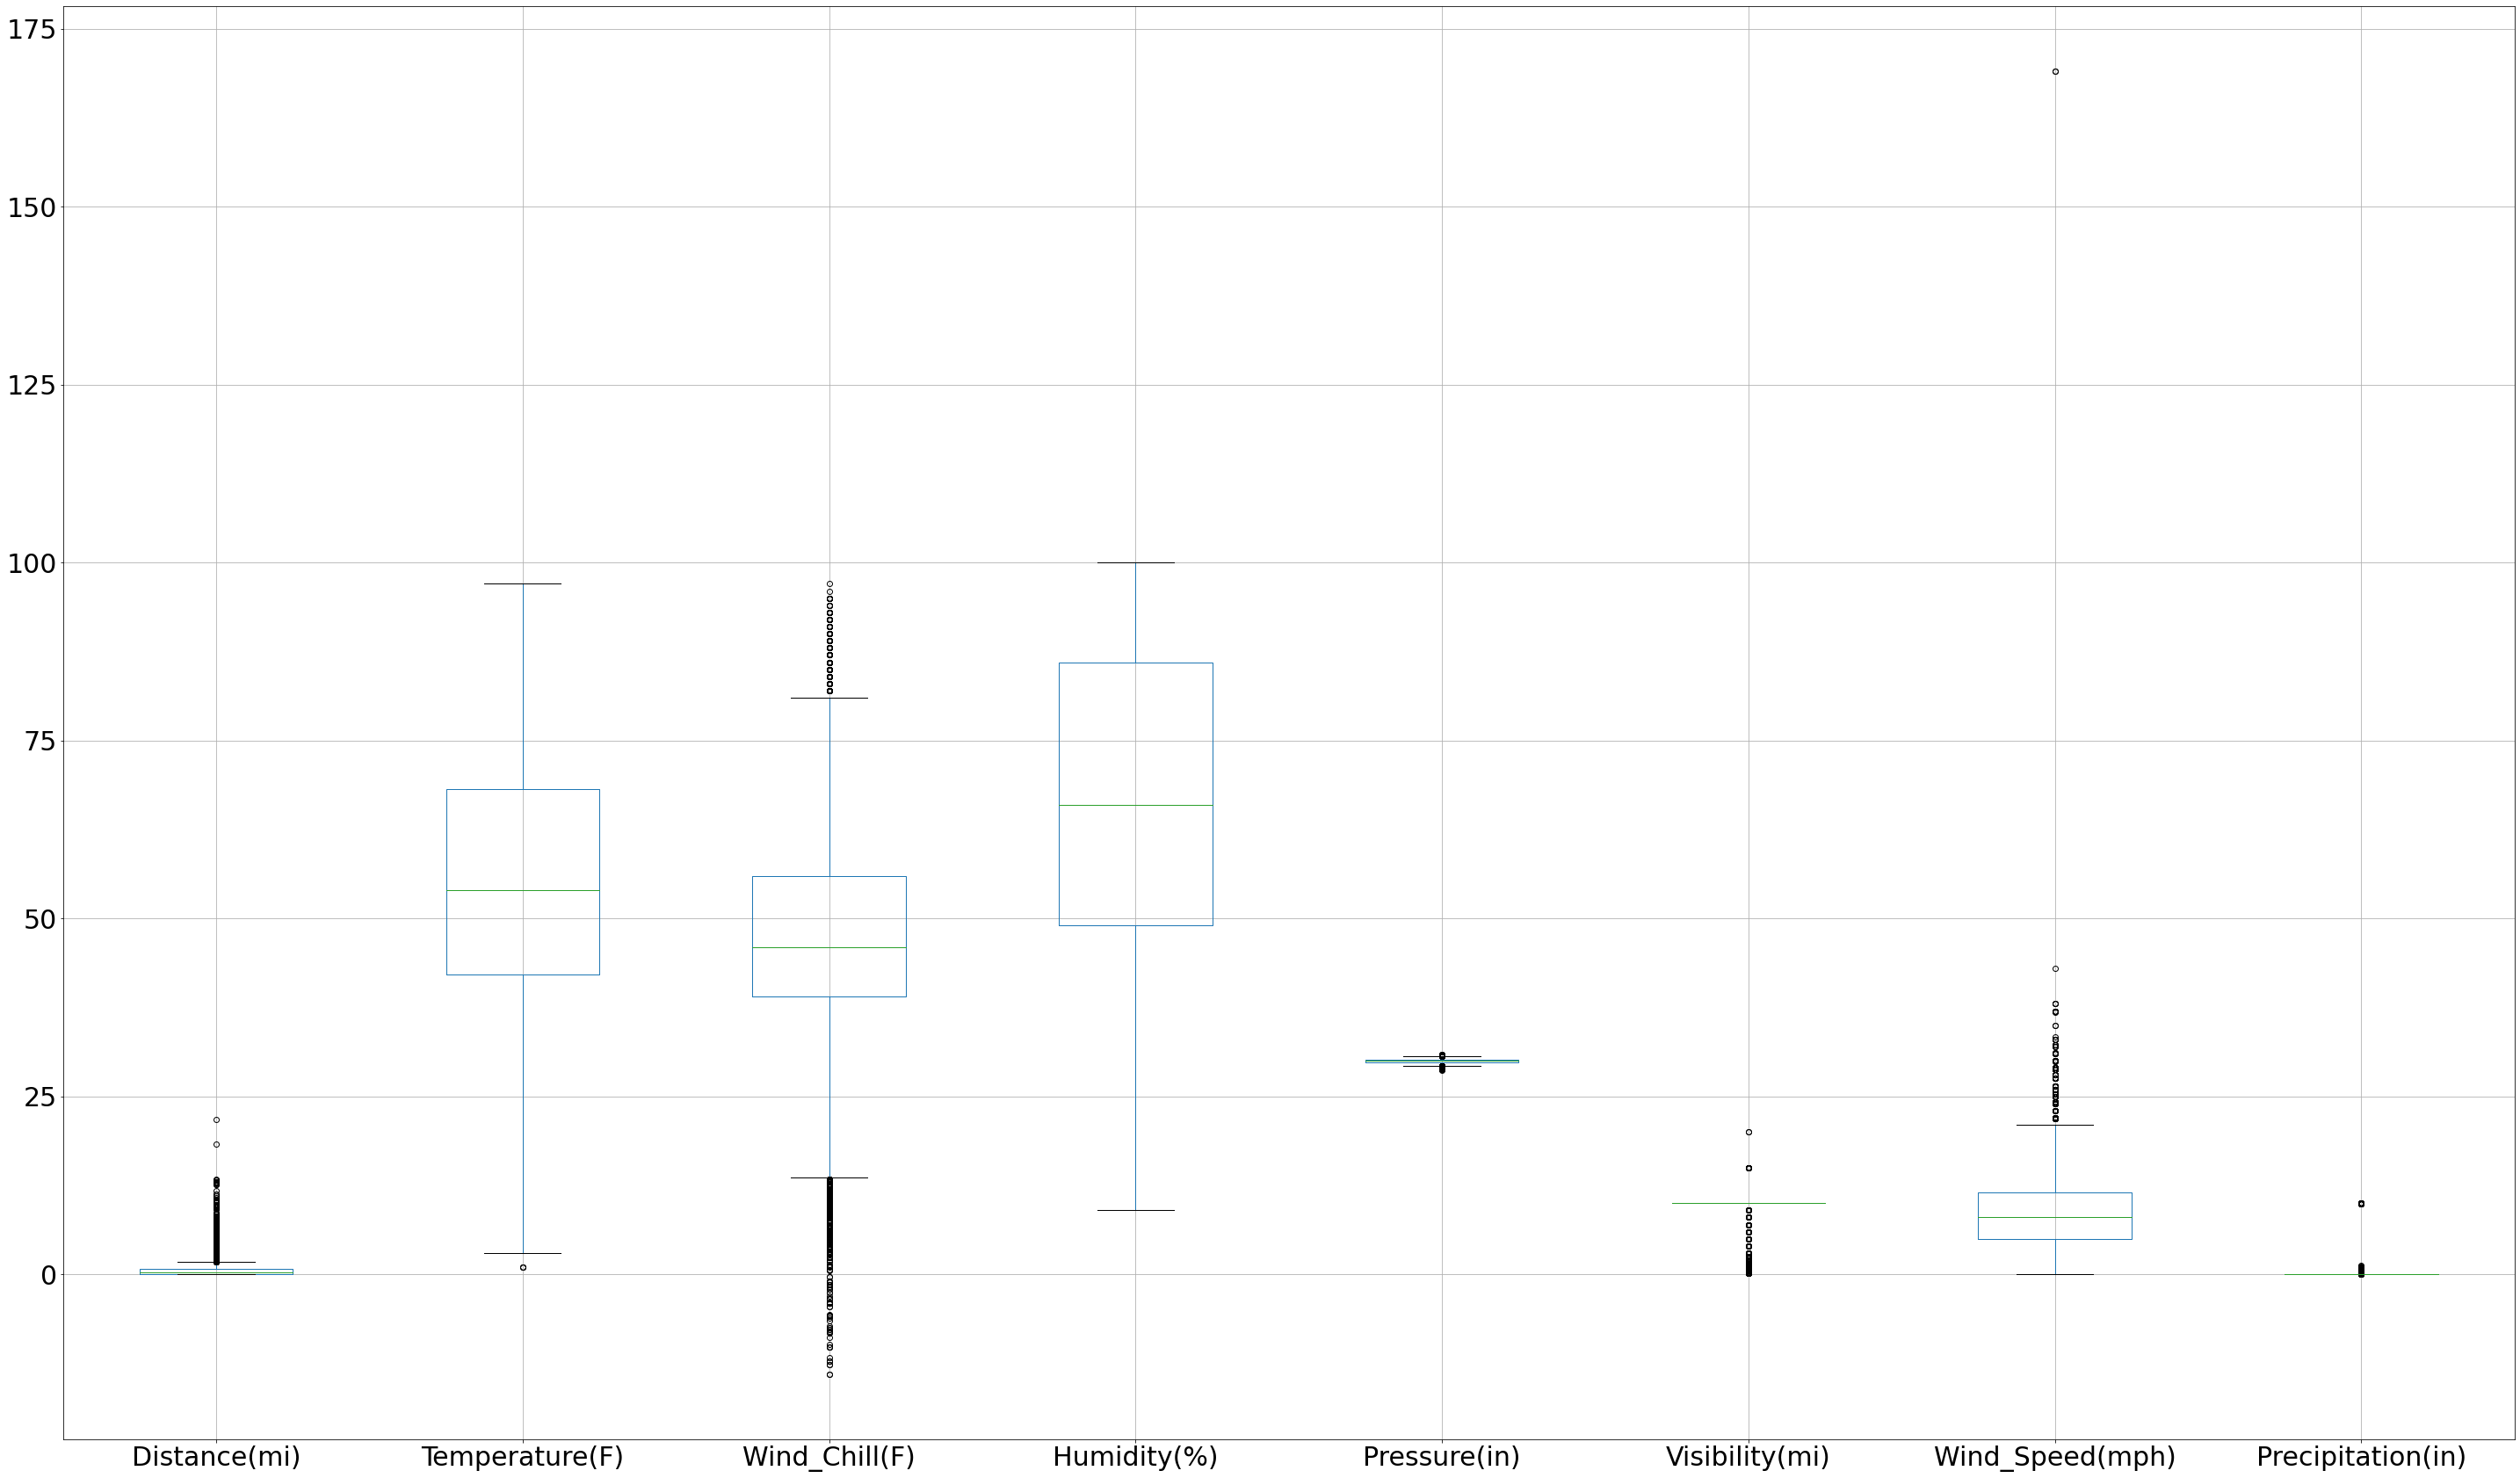

In [35]:
plt.figure(figsize=(50, 30))
data_numerical = data_numerical.drop(["Number"], axis=1)
data_for_boxplot = data_numerical.drop(["Start_Lat", "Start_Lng", "End_Lat", "End_Lng"], axis=1)
data_for_boxplot.boxplot(fontsize=30);

In [36]:
data_in.shape

(28925, 46)

In [37]:
rows_to_drop = data_in[
    (data_in['Visibility(mi)']  < data_in['Visibility(mi)'].quantile(0.005)) | (data_in['Visibility(mi)']  > data_in['Visibility(mi)'].quantile(0.995)) |
    (data_in['Wind_Speed(mph)']  < data_in['Wind_Speed(mph)'].quantile(0.005)) | (data_in['Wind_Speed(mph)']  > data_in['Wind_Speed(mph)'].quantile(0.995)) |
    (data_in['Precipitation(in)']  < data_in['Precipitation(in)'].quantile(0.005)) | (data_in['Precipitation(in)']  > data_in['Precipitation(in)'].quantile(0.995))
].index
data_in_old = data_in
data_in = data_in.drop(rows_to_drop)
data_in.shape

(28534, 46)

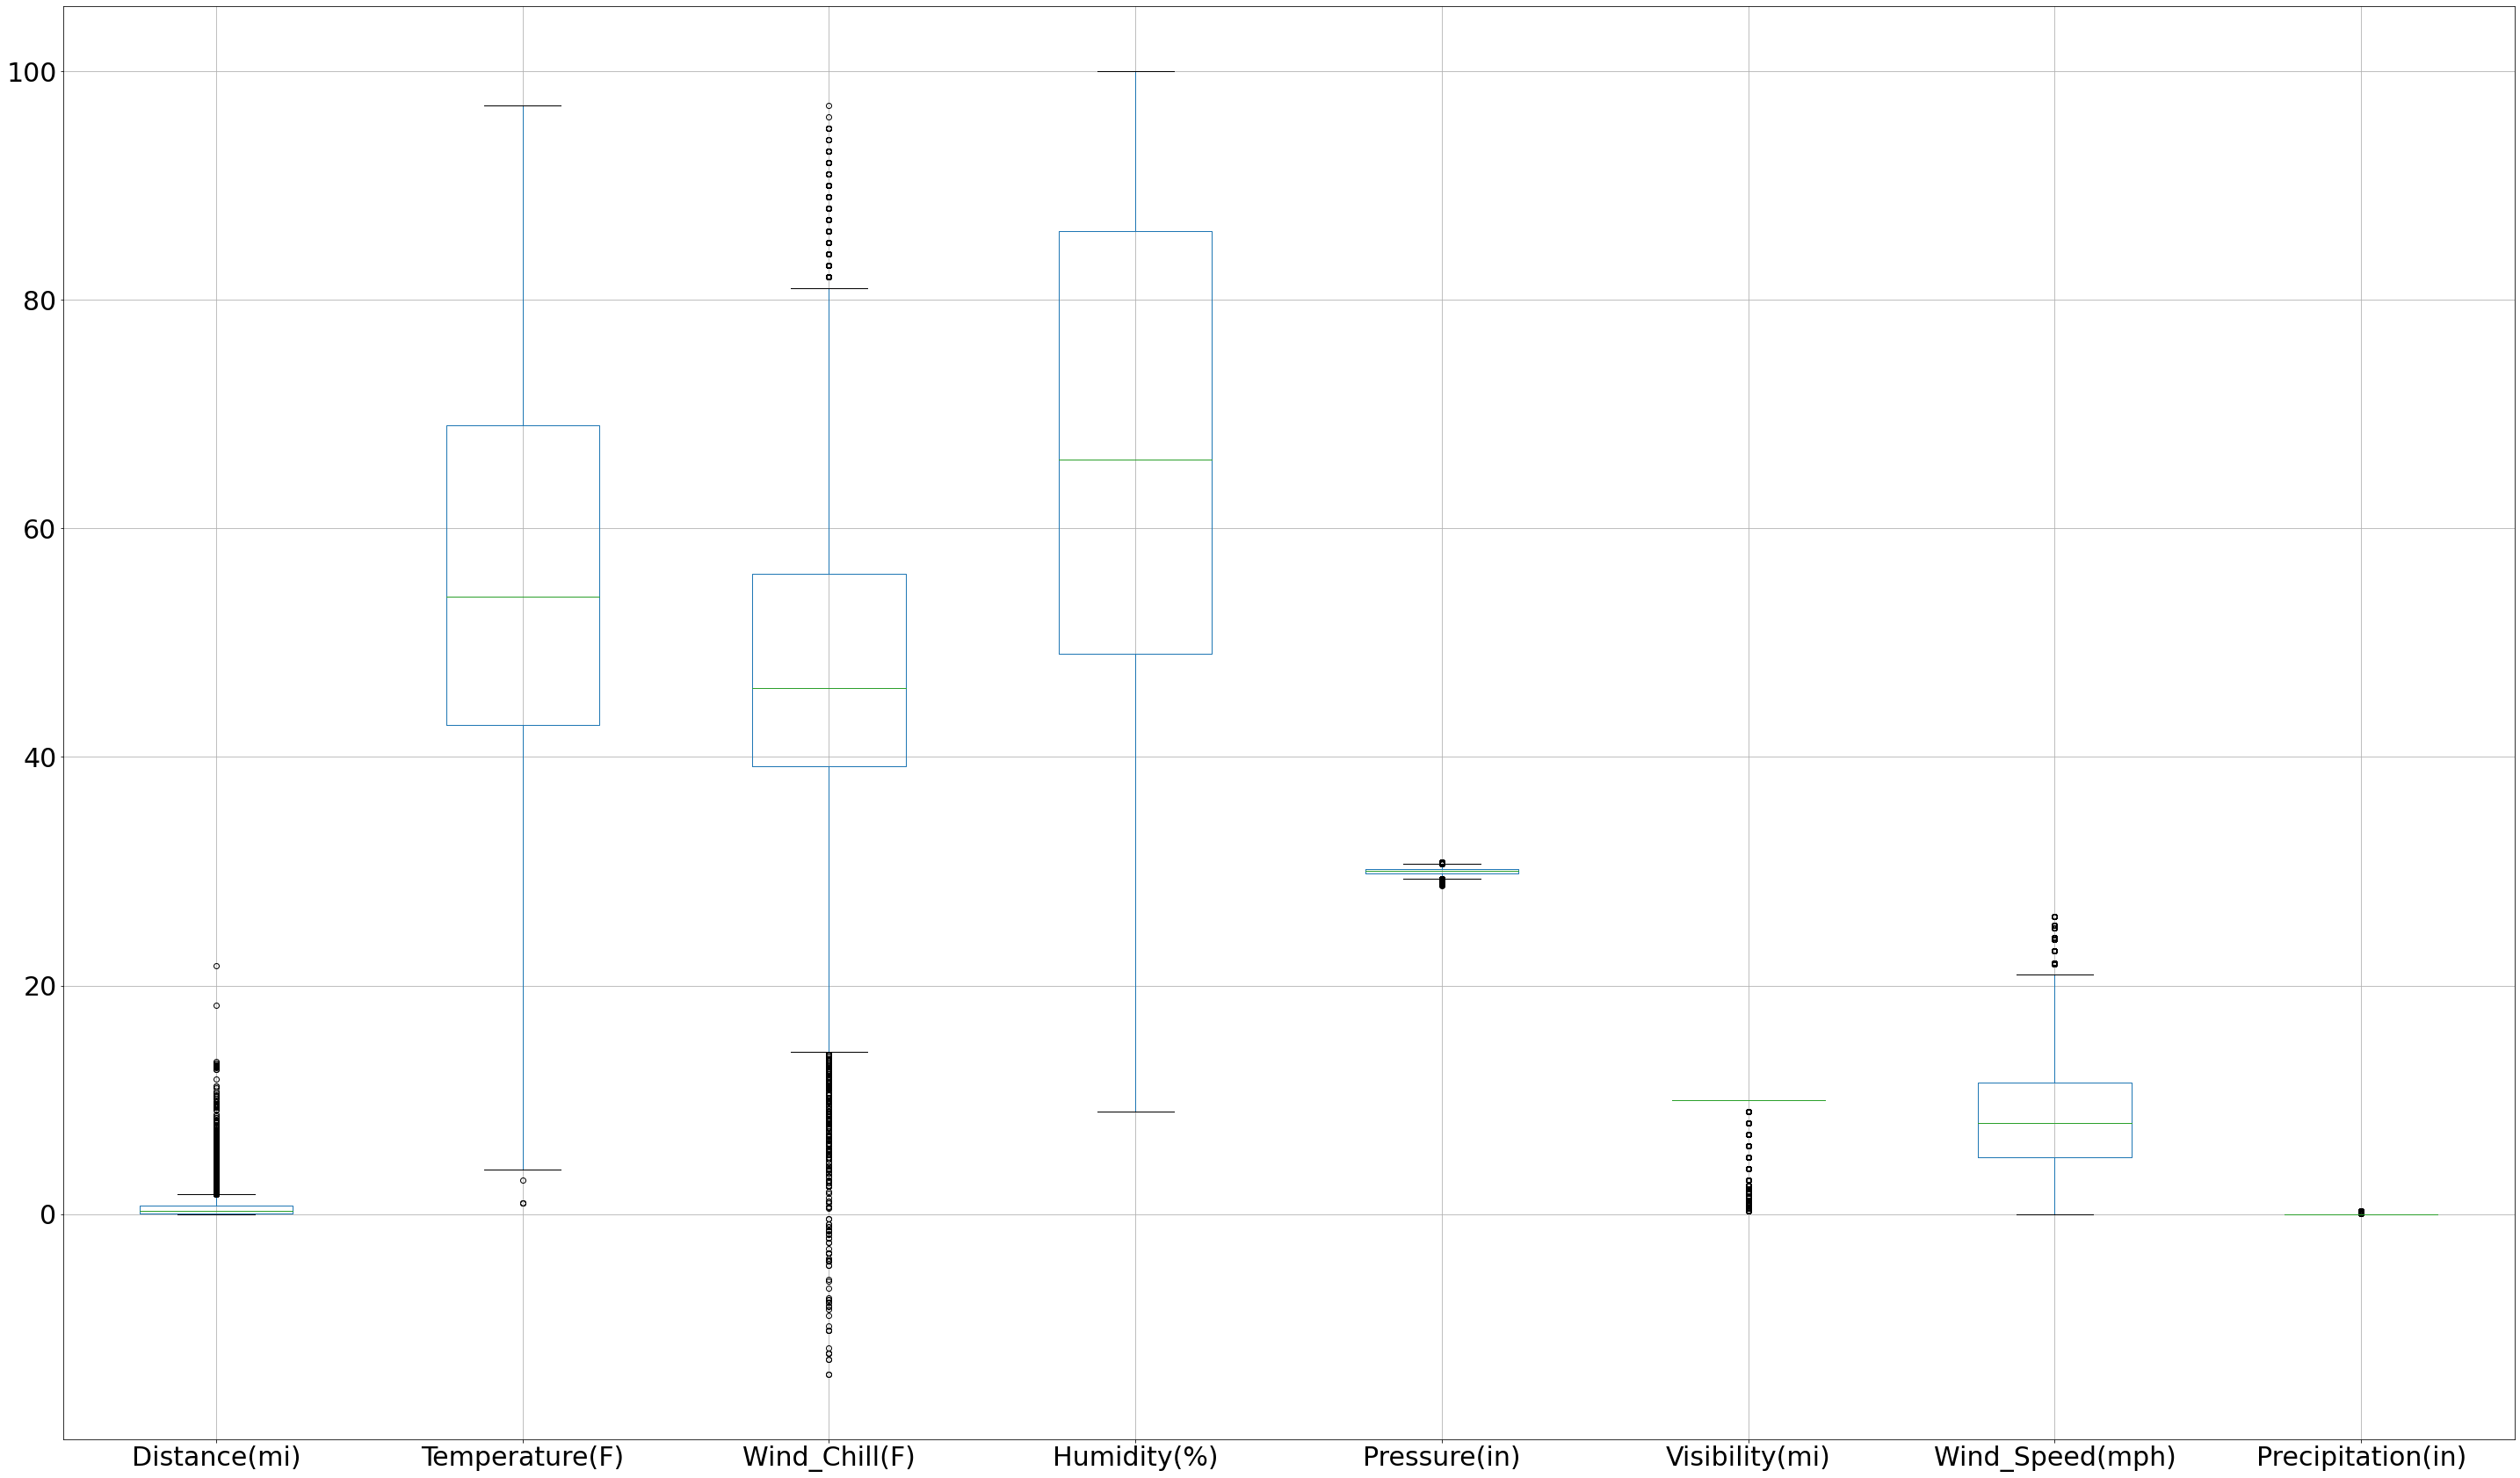

In [38]:
numerical_columns = [c for c in data_in.columns if data_in[c].dtype.name == 'float64']
data_numerical = data_in[numerical_columns]
data_numerical = data_numerical.drop(["Number"], axis=1)
plt.figure(figsize=(50, 30))
data_for_boxplot = data_numerical.drop(["Start_Lat", "Start_Lng", "End_Lat", "End_Lng"], axis=1)
data_for_boxplot.boxplot(fontsize=30);

### Normalization

In [39]:
data_numerical = (data_numerical - data_numerical.mean(axis=0)) / data_numerical.std(axis=0)
data_numerical

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
32539,0.252806,0.278398,0.243547,0.282019,-0.306613,-0.070513,-0.100404,1.363836,-0.688373,-1.882277,0.180376,4.757009
32562,-1.450191,-1.847536,-1.438409,-1.842769,-0.249529,0.284481,-0.100404,1.410839,-0.952057,-2.466789,-0.492905,-0.235965
32564,-0.459102,-0.745139,-0.469938,-0.751179,-0.255334,-0.017264,-0.100404,1.269830,-0.876719,-1.102928,-0.492905,0.180116
32581,1.056280,0.766417,1.056257,0.771950,-0.416910,-0.076430,-0.100404,1.128822,-0.763712,-1.882277,0.873459,-0.235965
32583,1.054741,0.779774,1.057376,0.774868,-0.497213,-0.076430,-0.100404,1.128822,-0.763712,-1.882277,0.873459,-0.235965
...,...,...,...,...,...,...,...,...,...,...,...,...
1515689,-1.481656,-1.525171,-1.481614,-1.522471,-0.587193,0.811057,1.376006,0.846805,-0.161005,0.455771,-1.047372,-0.235965
1515690,-1.481656,-1.525171,-1.481614,-1.522471,-0.587193,0.811057,1.376006,0.846805,-0.161005,0.455771,-1.047372,-0.235965
1515694,0.567178,0.858149,0.570027,0.842575,-0.348216,1.106886,1.696964,-0.187257,-0.010329,0.455771,-0.057253,-0.235965
1515695,0.045434,-0.041582,0.049402,-0.033744,-0.377241,0.811057,1.376006,0.423780,-0.349351,0.455771,-1.641443,-0.235965


## Merge all data

Соберем таблицу из числовых, бинарных и категориальных данных (за исключением "Severity") для Х

Бинаризация категориальных признаков

In [40]:
data_categorical = pd.get_dummies(data_in[categorical_columns])
data_categorical

,Side_L,Side_R,Wind_Direction_CALM,Wind_Direction_Calm,Wind_Direction_E,Wind_Direction_ENE,Wind_Direction_ESE,Wind_Direction_East,Wind_Direction_N,Wind_Direction_NE,...,Weather_Condition_Wintry Mix,Weather_Condition_Wintry Mix / Windy,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Civil_Twilight_Day,Civil_Twilight_Night,Nautical_Twilight_Day,Nautical_Twilight_Night,Astronomical_Twilight_Day,Astronomical_Twilight_Night
32539,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,1,0
32562,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,1,0
32564,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
32581,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,1,0,1,0
32583,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515689,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1515690,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1515694,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1515695,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [41]:
data_binary = data_in[binary_columns]
data_binary

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
32539,False,False,False,False,False,False,False,False,False,False,False,False,False
32562,False,False,False,False,False,False,False,False,False,False,False,False,False
32564,False,False,False,False,False,False,False,False,False,False,False,False,False
32581,False,False,False,False,False,False,False,False,False,False,False,False,False
32583,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515689,False,False,False,False,False,False,False,False,False,False,False,True,False
1515690,False,False,False,False,False,False,False,False,False,False,False,True,False
1515694,False,False,False,False,False,False,False,False,False,False,False,False,False
1515695,False,False,False,False,False,False,False,False,False,False,False,False,False


In [42]:
data_numerical

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
32539,0.252806,0.278398,0.243547,0.282019,-0.306613,-0.070513,-0.100404,1.363836,-0.688373,-1.882277,0.180376,4.757009
32562,-1.450191,-1.847536,-1.438409,-1.842769,-0.249529,0.284481,-0.100404,1.410839,-0.952057,-2.466789,-0.492905,-0.235965
32564,-0.459102,-0.745139,-0.469938,-0.751179,-0.255334,-0.017264,-0.100404,1.269830,-0.876719,-1.102928,-0.492905,0.180116
32581,1.056280,0.766417,1.056257,0.771950,-0.416910,-0.076430,-0.100404,1.128822,-0.763712,-1.882277,0.873459,-0.235965
32583,1.054741,0.779774,1.057376,0.774868,-0.497213,-0.076430,-0.100404,1.128822,-0.763712,-1.882277,0.873459,-0.235965
...,...,...,...,...,...,...,...,...,...,...,...,...
1515689,-1.481656,-1.525171,-1.481614,-1.522471,-0.587193,0.811057,1.376006,0.846805,-0.161005,0.455771,-1.047372,-0.235965
1515690,-1.481656,-1.525171,-1.481614,-1.522471,-0.587193,0.811057,1.376006,0.846805,-0.161005,0.455771,-1.047372,-0.235965
1515694,0.567178,0.858149,0.570027,0.842575,-0.348216,1.106886,1.696964,-0.187257,-0.010329,0.455771,-0.057253,-0.235965
1515695,0.045434,-0.041582,0.049402,-0.033744,-0.377241,0.811057,1.376006,0.423780,-0.349351,0.455771,-1.641443,-0.235965


Матрица Х:

In [43]:
X = pd.concat((data_numerical,data_binary,data_categorical), axis=1)
X

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),...,Weather_Condition_Wintry Mix,Weather_Condition_Wintry Mix / Windy,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Civil_Twilight_Day,Civil_Twilight_Night,Nautical_Twilight_Day,Nautical_Twilight_Night,Astronomical_Twilight_Day,Astronomical_Twilight_Night
32539,0.252806,0.278398,0.243547,0.282019,-0.306613,-0.070513,-0.100404,1.363836,-0.688373,-1.882277,...,0,0,1,0,1,0,1,0,1,0
32562,-1.450191,-1.847536,-1.438409,-1.842769,-0.249529,0.284481,-0.100404,1.410839,-0.952057,-2.466789,...,0,0,1,0,1,0,1,0,1,0
32564,-0.459102,-0.745139,-0.469938,-0.751179,-0.255334,-0.017264,-0.100404,1.269830,-0.876719,-1.102928,...,0,0,1,0,1,0,1,0,1,0
32581,1.056280,0.766417,1.056257,0.771950,-0.416910,-0.076430,-0.100404,1.128822,-0.763712,-1.882277,...,0,0,0,1,0,1,1,0,1,0
32583,1.054741,0.779774,1.057376,0.774868,-0.497213,-0.076430,-0.100404,1.128822,-0.763712,-1.882277,...,0,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515689,-1.481656,-1.525171,-1.481614,-1.522471,-0.587193,0.811057,1.376006,0.846805,-0.161005,0.455771,...,0,0,1,0,1,0,1,0,1,0
1515690,-1.481656,-1.525171,-1.481614,-1.522471,-0.587193,0.811057,1.376006,0.846805,-0.161005,0.455771,...,0,0,1,0,1,0,1,0,1,0
1515694,0.567178,0.858149,0.570027,0.842575,-0.348216,1.106886,1.696964,-0.187257,-0.010329,0.455771,...,0,0,1,0,1,0,1,0,1,0
1515695,0.045434,-0.041582,0.049402,-0.033744,-0.377241,0.811057,1.376006,0.423780,-0.349351,0.455771,...,0,0,1,0,1,0,1,0,1,0


y состоит из столбца Severity

Вектор y:

In [44]:
y = data_in["Severity"]
y

32539      2
32562      2
32564      2
32581      2
32583      2
          ..
1515689    3
1515690    3
1515694    2
1515695    2
1515696    2
Name: Severity, Length: 28534, dtype: int64

## Train/test split

In [45]:
seed = 15086
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

In [86]:
X_train

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),...,Weather_Condition_Wintry Mix,Weather_Condition_Wintry Mix / Windy,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Civil_Twilight_Day,Civil_Twilight_Night,Nautical_Twilight_Day,Nautical_Twilight_Night,Astronomical_Twilight_Day,Astronomical_Twilight_Night
327078,0.946609,1.236035,0.945044,1.238262,-0.450773,-0.549756,-0.357171,-0.375268,0.215686,0.455771,...,0,0,0,1,0,1,0,1,0,1
37930,0.944544,1.248691,0.936477,1.288981,0.286476,-1.975651,-2.584625,-0.281262,-0.274013,-0.713253,...,0,0,1,0,1,0,1,0,1,0
1244163,1.366803,-0.000508,1.365192,0.000037,-0.536882,-0.727253,-0.402106,1.081819,0.592377,-1.102928,...,0,0,1,0,1,0,1,0,1,0
202519,0.643390,0.522218,0.631923,0.505585,-0.175998,1.580212,-0.100404,-0.657285,-0.161005,0.455771,...,0,0,0,1,0,1,0,1,0,1
639135,1.038862,1.107430,1.037030,1.107824,-0.486571,-1.318911,-1.448431,0.752799,-0.876719,0.066096,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465669,1.181964,-1.880353,1.127170,-1.831528,1.187235,0.515228,1.055047,-0.046248,-2.082131,0.455771,...,0,0,1,0,1,0,1,0,1,0
1347764,0.756244,0.589628,0.762586,0.591239,-0.377241,-0.378175,-0.100404,-1.456333,-0.650704,0.455771,...,0,0,1,0,1,0,1,0,1,0
337430,-0.051833,-0.046768,0.061138,0.037827,3.040031,-0.786419,-0.357171,-0.140254,0.140348,0.455771,...,0,0,0,1,0,1,0,1,0,1
52780,-0.804065,-0.817448,-0.979656,-1.077637,6.466979,0.284481,-0.100404,0.658794,-0.387020,0.455771,...,0,0,0,1,0,1,0,1,0,1


## kNN

In [91]:
err_train_accuracy = []
err_test_accuracy = []
err_f1 = []
nn_range = range(1, 30)

def calc_knn(nn):
    print("KNN", nn, "neighbours")
    knn = KNeighborsClassifier(n_neighbors=nn)
    knn.fit(X_train.values, y_train.values)
    y_train_predict = knn.predict(X_train.values)
    y_test_predict = knn.predict(X_test.values)
    err_train_accuracy.append(np.mean(y_train != y_train_predict))
    err_test_accuracy.append(np.mean(y_test != y_test_predict))
    print(np.mean(y_train != y_train_predict))
    print(np.mean(y_test != y_test_predict))
    print(confusion_matrix(y_test, y_test_predict))

for nn in nn_range:
    %time calc_knn(nn)

KNN 1 neighbours
0.004984423676012461
0.24351786965662228
[[   2    4    2    0]
 [   0 1803  190  106]
 [   0  222  144   26]
 [   0  116   29  210]]
CPU times: user 18.9 s, sys: 7.73 s, total: 26.7 s
Wall time: 12.8 s
KNN 2 neighbours
0.13169781931464175
0.24491941135248774
[[   2    6    0    0]
 [   3 1986   81   29]
 [   1  306   74   11]
 [   1  209   52   93]]
CPU times: user 21.2 s, sys: 7.92 s, total: 29.1 s
Wall time: 14.5 s
KNN 3 neighbours
0.1463006230529595
0.25683251576734406
[[   1    7    0    0]
 [   1 1901  133   64]
 [   0  277   92   23]
 [   1  201   26  127]]
CPU times: user 20.9 s, sys: 7.83 s, total: 28.8 s
Wall time: 14.7 s
KNN 4 neighbours
0.18555295950155765
0.2463209530483532
[[   2    6    0    0]
 [   0 1972   91   36]
 [   0  297   74   21]
 [   1  214   37  103]]
CPU times: user 25.3 s, sys: 7.87 s, total: 33.2 s
Wall time: 19.8 s
KNN 5 neighbours
0.1956386292834891
0.24421864050455502
[[   2    6    0    0]
 [   0 1968   93   38]
 [   0  297   81   14]


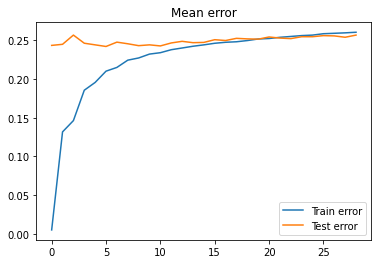

In [92]:
plt.plot(err_train_accuracy, label="Train error")
plt.plot(err_test_accuracy, label="Test error")
plt.title("Mean error")
plt.legend()
plt.show()

Попробуем использовать другие алгоритмы классификации и посмотрим на результат

## SVC

In [40]:
%%time
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

y_test_predict = svc.predict(X_test)
err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test != y_test_predict)

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.2720404984423676 0.26454099509460405
[[   0    8    0    0]
 [   0 2099    0    0]
 [   0  392    0    0]
 [   0  355    0    0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.74      1.00      0.85      2099
           3       0.00      0.00      0.00       392
           4       0.00      0.00      0.00       355

    accuracy                           0.74      2854
   macro avg       0.18      0.25      0.21      2854
weighted avg       0.54      0.74      0.62      2854

CPU times: user 4min 22s, sys: 2.58 s, total: 4min 25s
Wall time: 4min 25s


## Random forest classifier

In [41]:
%%time
rf = ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

y_test_predict = rf.predict(X_test)
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.004517133956386293 0.18535388927820604
[[   2    6    0    0]
 [   0 2060   12   27]
 [   0  276  103   13]
 [   0  188    7  160]]
              precision    recall  f1-score   support

           1       1.00      0.25      0.40         8
           2       0.81      0.98      0.89      2099
           3       0.84      0.26      0.40       392
           4       0.80      0.45      0.58       355

    accuracy                           0.81      2854
   macro avg       0.86      0.49      0.57      2854
weighted avg       0.82      0.81      0.78      2854

CPU times: user 8.53 s, sys: 72.3 ms, total: 8.6 s
Wall time: 8.59 s


## Extra trees classifier

In [42]:
%%time
ert = ensemble.ExtraTreesClassifier(n_estimators=100)
ert.fit(X_train, y_train)

y_test_predict = ert.predict(X_test)
err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.004517133956386293 0.1951646811492642
[[   2    6    0    0]
 [   0 2033   32   34]
 [   0  279  101   12]
 [   0  188    6  161]]
              precision    recall  f1-score   support

           1       1.00      0.25      0.40         8
           2       0.81      0.97      0.88      2099
           3       0.73      0.26      0.38       392
           4       0.78      0.45      0.57       355

    accuracy                           0.80      2854
   macro avg       0.83      0.48      0.56      2854
weighted avg       0.80      0.80      0.77      2854

CPU times: user 9.19 s, sys: 150 ms, total: 9.34 s
Wall time: 9.34 s


## Adaptive Boost

In [43]:
%%time
ada = ensemble.AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)

y_test_predict = ada.predict(X_test)
err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != y_test_predict)

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.4437305295950156 0.4439383321653819
[[   1    7    0    0]
 [   3 1378  155  563]
 [   0  222   52  118]
 [   1  182   16  156]]
              precision    recall  f1-score   support

           1       0.20      0.12      0.15         8
           2       0.77      0.66      0.71      2099
           3       0.23      0.13      0.17       392
           4       0.19      0.44      0.26       355

    accuracy                           0.56      2854
   macro avg       0.35      0.34      0.32      2854
weighted avg       0.62      0.56      0.58      2854

CPU times: user 28.4 s, sys: 270 ms, total: 28.7 s
Wall time: 28.7 s


## Gradient Boosting

In [44]:
%%time
gbt = ensemble.GradientBoostingClassifier(n_estimators=100)
gbt.fit(X_train, y_train)

y_test_predict = gbt.predict(X_test)
err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != y_test_predict)

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.23785046728971962 0.23265592151366504
[[   1    6    1    0]
 [   0 2059    6   34]
 [   0  352   25   15]
 [   1  247    2  105]]
              precision    recall  f1-score   support

           1       0.50      0.12      0.20         8
           2       0.77      0.98      0.86      2099
           3       0.74      0.06      0.12       392
           4       0.68      0.30      0.41       355

    accuracy                           0.77      2854
   macro avg       0.67      0.37      0.40      2854
weighted avg       0.76      0.77      0.70      2854

CPU times: user 50.8 s, sys: 392 ms, total: 51.2 s
Wall time: 51.3 s


## Decision tree

In [45]:
%%time
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_test_predict = dt.predict(X_test)
err_train = np.mean(y_train != dt.predict(X_train))
err_test = np.mean(y_test != y_test_predict)

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.004517133956386293 0.271198318149965
[[   3    4    1    0]
 [   5 1726  220  148]
 [   0  200  155   37]
 [   1  122   36  196]]
              precision    recall  f1-score   support

           1       0.33      0.38      0.35         8
           2       0.84      0.82      0.83      2099
           3       0.38      0.40      0.39       392
           4       0.51      0.55      0.53       355

    accuracy                           0.73      2854
   macro avg       0.52      0.54      0.53      2854
weighted avg       0.74      0.73      0.73      2854

CPU times: user 1.01 s, sys: 9.4 ms, total: 1.02 s
Wall time: 1.02 s


## Eliminating correlated variables

Для того, чтобы сократить время работы классификатора имеет смысл исключить коррелированные переменные. Они дают одну и ту же информацию для модели, но обрабатываются моделью все.

In [51]:
X2 = X

Удаляем коррелированные переменные в соответствии с корреляционной матрицей

In [52]:
X2 = X2.drop(["Start_Lng", "End_Lat", "End_Lng", "Wind_Chill(F)"], axis=1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.1, random_state=seed)

In [54]:
err_train_accuracy = []
err_test_accuracy = []
err_f1 = []
nn_range = range(1, 30)

def calc_knn(nn):
    print("KNN", nn, "neighbours")
    knn = KNeighborsClassifier(n_neighbors=nn)
    knn.fit(X_train.values, y_train.values)
    y_train_predict = knn.predict(X_train.values)
    y_test_predict = knn.predict(X_test.values)
    err_train_accuracy.append(np.mean(y_train != y_train_predict))
    err_test_accuracy.append(np.mean(y_test != y_test_predict))
    print(np.mean(y_train != y_train_predict))
    print(np.mean(y_test != y_test_predict))
    print(confusion_matrix(y_test, y_test_predict))

for nn in nn_range:
    %time calc_knn(nn)

KNN 1 neighbours
0.005023364485981309
0.2578836720392432
[[   2    5    1    0]
 [   2 1780  197  120]
 [   1  217  141   33]
 [   1  121   38  195]]
CPU times: user 25.1 s, sys: 26 s, total: 51.1 s
Wall time: 16 s
KNN 2 neighbours
0.1355919003115265
0.24737210932025228
[[   2    5    1    0]
 [   4 1977   96   22]
 [   2  306   79    5]
 [   1  215   49   90]]
CPU times: user 26.5 s, sys: 24.3 s, total: 50.8 s
Wall time: 17 s
KNN 3 neighbours
0.15194704049844238
0.2620882971268395
[[   1    6    1    0]
 [   1 1903  137   58]
 [   1  290   82   19]
 [   1  206   28  120]]
CPU times: user 28.6 s, sys: 25.3 s, total: 53.9 s
Wall time: 19.2 s
KNN 4 neighbours
0.18812305295950155
0.25683251576734406
[[   1    7    0    0]
 [   1 1974   81   43]
 [   1  317   57   17]
 [   2  227   37   89]]
CPU times: user 31.5 s, sys: 24.6 s, total: 56.1 s
Wall time: 21.8 s
KNN 5 neighbours
0.2021417445482866
0.25683251576734406
[[   1    6    1    0]
 [   1 1960   99   39]
 [   0  315   66   11]
 [   0 

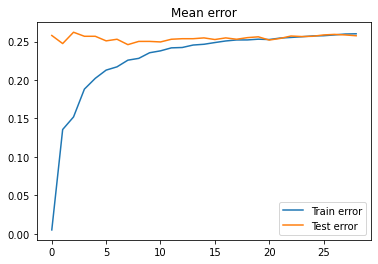

In [55]:
plt.plot(err_train_accuracy, label="Train error")
plt.plot(err_test_accuracy, label="Test error")
plt.title("Mean error")
plt.legend()
plt.show()

Значительного ускорения при исключении коррелированных переменных достичь не удалось, но оно есть, а также точность классификации почти не изменилась (ошибка стала больше на 0.4%), как и ожидалось.

## Imbalance classes correction

In [39]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

In [50]:
rus = RandomUnderSampler()
X_train, y_train = rus.fit_resample(X_train, y_train)

In [51]:
err_train_accuracy = []
err_test_accuracy = []
err_f1 = []
nn_range = range(1, 30)

def calc_knn(nn):
    print("KNN", nn, "neighbours")
    knn = KNeighborsClassifier(n_neighbors=nn)
    knn.fit(X_train.values, y_train.values)
    y_train_predict = knn.predict(X_train.values)
    y_test_predict = knn.predict(X_test.values)
    err_train_accuracy.append(np.mean(y_train != y_train_predict))
    err_test_accuracy.append(np.mean(y_test != y_test_predict))
    print(np.mean(y_train != y_train_predict))
    print(np.mean(y_test != y_test_predict))
    print(confusion_matrix(y_test, y_test_predict))

for nn in nn_range:
    calc_knn(nn)

KNN 1 neighbours
0.0043859649122807015
0.6443587946741416
[[  4   2   2   0]
 [268 725 590 516]
 [ 49 118 144  81]
 [ 40  90  83 142]]
KNN 2 neighbours
0.34649122807017546
0.5826909600560617
[[   6    0    2    0]
 [ 429 1021  486  163]
 [  80  180  107   25]
 [  68  150   80   57]]
KNN 3 neighbours
0.35526315789473684
0.6163279607568325
[[  6   0   2   0]
 [438 866 443 352]
 [ 80 155 113  44]
 [ 72 112  61 110]]
KNN 4 neighbours
0.37280701754385964
0.6415557112824106
[[  6   0   2   0]
 [437 789 505 368]
 [ 75 151 115  51]
 [ 68 108  66 113]]
KNN 5 neighbours
0.41228070175438597
0.6327960756832516
[[  6   0   2   0]
 [431 834 529 305]
 [ 79 154 112  47]
 [ 68 127  64  96]]
KNN 6 neighbours
0.39035087719298245
0.6373510861948143
[[  7   0   1   0]
 [473 811 503 312]
 [ 79 148 109  56]
 [ 72 111  64 108]]
KNN 7 neighbours
0.4649122807017544
0.6545199719691661
[[  7   0   1   0]
 [463 763 545 328]
 [ 77 142 110  63]
 [ 83 103  63 106]]
KNN 8 neighbours
0.4649122807017544
0.64681149264190

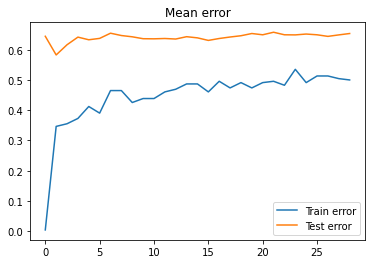

In [52]:
plt.plot(err_train_accuracy, label="Train error")
plt.plot(err_test_accuracy, label="Test error")
plt.title("Mean error")
plt.legend()
plt.show()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

In [45]:
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

In [47]:
err_train_accuracy = []
err_test_accuracy = []
err_f1 = []
nn_range = range(1, 30)

def calc_knn(nn):
    print("KNN", nn, "neighbours")
    knn = KNeighborsClassifier(n_neighbors=nn)
    knn.fit(X_train.values, y_train.values)
    y_train_predict = knn.predict(X_train.values)
    y_test_predict = knn.predict(X_test.values)
    err_train_accuracy.append(np.mean(y_train != y_train_predict))
    err_test_accuracy.append(np.mean(y_test != y_test_predict))
    print(np.mean(y_train != y_train_predict))
    print(np.mean(y_test != y_test_predict))
    print(confusion_matrix(y_test, y_test_predict))

for nn in nn_range:
    calc_knn(nn)

KNN 1 neighbours
0.005710388359901572
0.24351786965662228
[[   2    4    2    0]
 [   0 1803  190  106]
 [   0  222  144   26]
 [   0  116   29  210]]
KNN 2 neighbours
0.009294426019043544
0.2431674842326559
[[   2    4    2    0]
 [   3 1807  186  103]
 [   0  223  143   26]
 [   0  117   30  208]]
KNN 3 neighbours
0.03939766770086659
0.30063069376313944
[[   2    3    3    0]
 [   3 1580  335  181]
 [   0  160  192   40]
 [   0   86   47  222]]
KNN 4 neighbours
0.03989247887022574
0.2999299229152067
[[   2    3    3    0]
 [   3 1585  329  182]
 [   1  163  189   39]
 [   0   85   48  222]]
KNN 5 neighbours
0.06924681716058628
0.35739313244569026
[[   2    1    5    0]
 [   3 1395  440  261]
 [   1  130  207   54]
 [   0   65   60  230]]
KNN 6 neighbours
0.07444902107628117
0.35178696566222845
[[   2    1    5    0]
 [   5 1430  417  247]
 [   1  140  199   52]
 [   1   69   66  219]]
KNN 7 neighbours
0.09798598480795977
0.40189208128941833
[[   2    1    5    0]
 [   5 1269  508  31

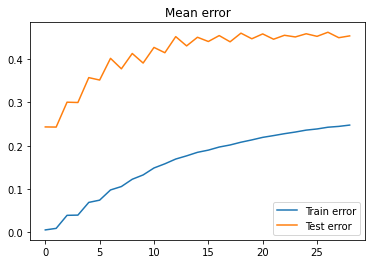

In [48]:
plt.plot(err_train_accuracy, label="Train error")
plt.plot(err_test_accuracy, label="Test error")
plt.title("Mean error")
plt.legend()
plt.show()

В результате избавления от несбалансированных классов путем undersampling'а (выравнивания в train выборке присутствия всех классов путем отбрасывания в больших классов данных) ошибка значительно увеличилась (до 60%). Это связано с тем, что в классе 1 слишком мало данных. undersampling в нашем случае не подходит для решения задачи.

При использовании oversampling время решения увеличивается, но точность тоже падает. С увеличением количества ближайших соседей ошибка увеличивается. В лучшем случае (1 сосед) ошибка 24%, в худшем (27 соседей) ошибка достигает значения 46%

## Выводы:

В рамках данной работы:
- были изучены библиотеки машинного обучения sklearn, библиотека для анализа данных pandas
- закреплены навыки работы с библиотеками matplotlib и seaborn для рисования графиков
- была проведена работа с данными
  * обработка пропущенных значений
  * обработка выбросов
  * бинаризация категориальных признаков
  * нормализация числовых признаков
  * исключение коррелированных переменных
- были использованы на практике алгоритмы классификации:
  * k nearest neighbors (kNN)
  * SVC
  * Random forest classifier
  * Extra trees classifier
  * Adaptive Boost (AdaBoost)
  * Gradient Boosting
  * Decision tree
- было проведено избавление от несбалансированности классов

### Результаты:

При помощи алгоритма k ближайших соседей удалось добиться средней ошибки в 24.2% при k порядка 11. В целом значение ошибки колеблется около 24-25%. Влияние количества соседей при этом небольшое.

Также были рассмотрены другие алгоритмы классификации.  
Наилучший результат по точности показал random forest classifier. Там ошибка составляет 19.1%.  
Лучше kNN себя показали random forest, extra trees classifier (19-21%). На уровне kNN по точности сработал gradient boosting. Немного хуже результат показали SVC и decision tree (26-27%). Но SVC работает при этом значительно дольше, а random forest, extra trees classifier и быстрее, и лучше при подобранном значении n_estimators = 100.  
Decision tree показал результат на несколько процентов хуже, но работает существенно быстрее.
Хуже всего показал себя алгоритм AdaBoost. 

# Neural networks

### One layer network

In [135]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [136]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42)

In [137]:
%%time
mlp_model.fit(X_train, y_train)

y_test_predict = mlp_model.predict(X_test)
err_train = np.mean(y_train != mlp_model.predict(X_train))
err_test = np.mean(y_test != y_test_predict)

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.2445093457943925 0.24141555711282411
[[   1    7    0    0]
 [   0 2024   19   56]
 [   0  340   27   25]
 [   0  231   11  113]]
              precision    recall  f1-score   support

           1       1.00      0.12      0.22         8
           2       0.78      0.96      0.86      2099
           3       0.47      0.07      0.12       392
           4       0.58      0.32      0.41       355

    accuracy                           0.76      2854
   macro avg       0.71      0.37      0.40      2854
weighted avg       0.71      0.76      0.70      2854

CPU times: user 1min 22s, sys: 40.2 s, total: 2min 2s
Wall time: 30.8 s


Подберем оптимальное количество нейронов в диапазоне [10, 120] с шагом 10.

In [141]:
test_err = []
train_err = []
train_acc = []
test_acc = []

neurons_arr = range(10, 210, 10)

for neurons in neurons_arr:
    print(neurons)
    mlp_model = MLPClassifier(
                          hidden_layer_sizes = (neurons,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42)
    mlp_model.fit(X_train, y_train)
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


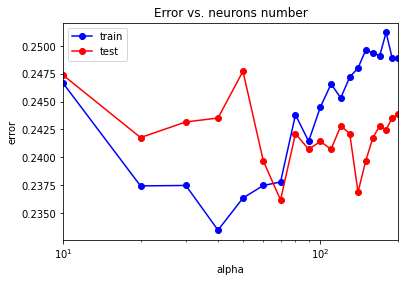

In [142]:
plt.semilogx(neurons_arr, train_err, 'b-o', label = 'train')
plt.semilogx(neurons_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(neurons_arr), np.max(neurons_arr)])
plt.title('Error vs. neurons number')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend();

In [145]:
optim_neurons = neurons_arr[np.argmin(test_err)]
print(optim_neurons)

70


Подберем оптимальное значение параметра $\alpha$ для алгоритма MLPClassifier из библиотеки sklearn в диапазоне [-3, 2] разделенные равномерно в логарифмическом масштабе.

In [149]:
alpha_arr = np.logspace(-3, 2, 21)

test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(
                          alpha=alpha,
                          hidden_layer_sizes = (optim_neurons,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42)
    mlp_model.fit(X_train, y_train)
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

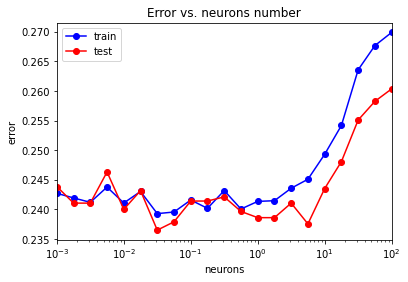

In [150]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. neurons number')
plt.xlabel('neurons')
plt.ylabel('error')
plt.legend();

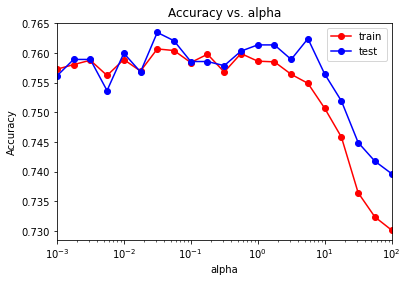

In [151]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend();

In [152]:
min_test_err = np.min(test_err)
print(min_test_err)

0.23651016117729504


In [153]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print(alpha_opt)

0.03162277660168379


In [154]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (optim_neurons,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.23929127725856697
0.23651016117729504


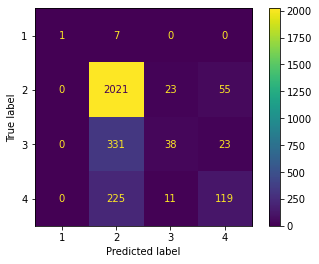

In [155]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp_model, X_test, y_test) 

In [156]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       1.00      0.12      0.22         8
           2       0.78      0.96      0.86      2099
           3       0.53      0.10      0.16       392
           4       0.60      0.34      0.43       355

    accuracy                           0.76      2854
   macro avg       0.73      0.38      0.42      2854
weighted avg       0.73      0.76      0.71      2854



### Two layers network

In [157]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,100),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42)

In [158]:
%%time
mlp_model.fit(X_train, y_train)

y_test_predict = mlp_model.predict(X_test)
err_train = np.mean(y_train != mlp_model.predict(X_train))
err_test = np.mean(y_test != y_test_predict)

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.24715732087227416 0.24351786965662228
[[   0    8    0    0]
 [   0 2036   10   53]
 [   0  350   21   21]
 [   0  249    4  102]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.77      0.97      0.86      2099
           3       0.60      0.05      0.10       392
           4       0.58      0.29      0.38       355

    accuracy                           0.76      2854
   macro avg       0.49      0.33      0.34      2854
weighted avg       0.72      0.76      0.69      2854

CPU times: user 2min 5s, sys: 44.8 s, total: 2min 50s
Wall time: 42.8 s


Подберем оптимальное количество нейронов в диапазоне [10, 120] с шагом 10.

In [160]:
test_err = []
train_err = []
train_acc = []
test_acc = []

for neurons in neurons_arr:
    print(neurons)
    mlp_model = MLPClassifier(
                          hidden_layer_sizes = (neurons, neurons),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42)
    mlp_model.fit(X_train, y_train)
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


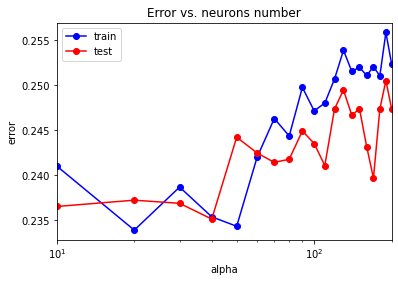

In [161]:
plt.semilogx(neurons_arr, train_err, 'b-o', label = 'train')
plt.semilogx(neurons_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(neurons_arr), np.max(neurons_arr)])
plt.title('Error vs. neurons number')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend();

In [162]:
optim_neurons = neurons_arr[np.argmin(test_err)]
print(optim_neurons)

40


Подберем оптимальное значение параметра $\alpha$ для алгоритма MLPClassifier из библиотеки sklearn в диапазоне [-3, 2] разделенные равномерно в логарифмическом масштабе.

In [163]:
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(
                          alpha=alpha,
                          hidden_layer_sizes = (optim_neurons, optim_neurons),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42)
    mlp_model.fit(X_train, y_train)
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

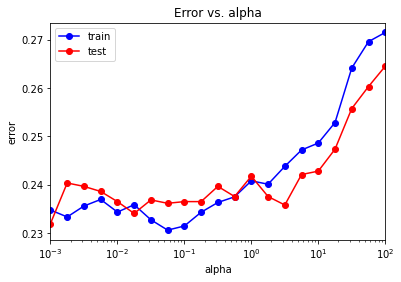

In [164]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend();

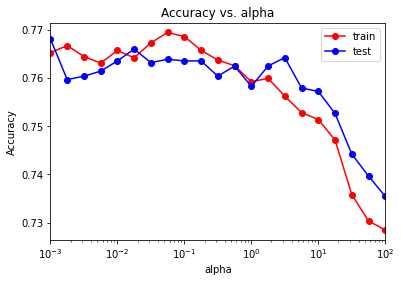

In [168]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend();

In [165]:
min_test_err = np.min(test_err)
print(min_test_err)

0.2319551506657323


In [166]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print(alpha_opt)

0.001


In [167]:
%%time
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (optim_neurons, optim_neurons),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.2347741433021807
0.2319551506657323
CPU times: user 53.5 s, sys: 15.1 s, total: 1min 8s
Wall time: 17.3 s


# Выводы:
В рамках данной работы:
- были получены навыки работы с multi-layer perceptron из библиотеки sklearn
- удалось достичь ошибки в 23.7% при использовании однослойной нейронной сети, что является хорошим результатом, но некоторые алгоритмы машинного обучения давали результаты лучше этого
- был получен результат, в котором время работы увеличивается, по сравнению с алгоритмом kNN, при этом точность увеличивается незначительно (примерно на 1-2%)
- была исследована зависимость от количества нейронов в слое. Оптимальный результат был достгнут при использовании 60 нейронов, при этом ошибка получилась минимальной
- был выполнен подбор гиперпараметра, оптимальное значение $\alpha$ в диапазоне [-3, 2] с выборкой 20 значений из данного интервала = 0.0316
- при использовании двухслойной нейронной сети результаты незначительно изменились, уналось получить выигрыша в 0.5%.: ошибка - 23.1% при оптимальном $\alpha$ = 0.001 и количестве нейронов 40 на каждом из двух слоев

# Neural networks

### One layer network

In [135]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [136]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42)

In [137]:
%%time
mlp_model.fit(X_train, y_train)

y_test_predict = mlp_model.predict(X_test)
err_train = np.mean(y_train != mlp_model.predict(X_train))
err_test = np.mean(y_test != y_test_predict)

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.2445093457943925 0.24141555711282411
[[   1    7    0    0]
 [   0 2024   19   56]
 [   0  340   27   25]
 [   0  231   11  113]]
              precision    recall  f1-score   support

           1       1.00      0.12      0.22         8
           2       0.78      0.96      0.86      2099
           3       0.47      0.07      0.12       392
           4       0.58      0.32      0.41       355

    accuracy                           0.76      2854
   macro avg       0.71      0.37      0.40      2854
weighted avg       0.71      0.76      0.70      2854

CPU times: user 1min 22s, sys: 40.2 s, total: 2min 2s
Wall time: 30.8 s


Подберем оптимальное количество нейронов в диапазоне [10, 120] с шагом 10.

In [141]:
test_err = []
train_err = []
train_acc = []
test_acc = []

neurons_arr = range(10, 210, 10)

for neurons in neurons_arr:
    print(neurons)
    mlp_model = MLPClassifier(
                          hidden_layer_sizes = (neurons,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42)
    mlp_model.fit(X_train, y_train)
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


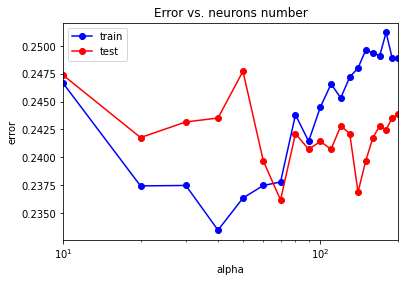

In [142]:
plt.semilogx(neurons_arr, train_err, 'b-o', label = 'train')
plt.semilogx(neurons_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(neurons_arr), np.max(neurons_arr)])
plt.title('Error vs. neurons number')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend();

In [145]:
optim_neurons = neurons_arr[np.argmin(test_err)]
print(optim_neurons)

70


Подберем оптимальное значение параметра $\alpha$ для алгоритма MLPClassifier из библиотеки sklearn в диапазоне [-3, 2] разделенные равномерно в логарифмическом масштабе.

In [149]:
alpha_arr = np.logspace(-3, 2, 21)

test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(
                          alpha=alpha,
                          hidden_layer_sizes = (optim_neurons,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42)
    mlp_model.fit(X_train, y_train)
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

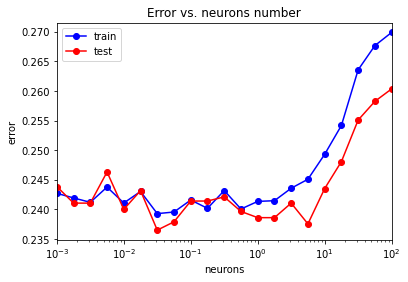

In [150]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. neurons number')
plt.xlabel('neurons')
plt.ylabel('error')
plt.legend();

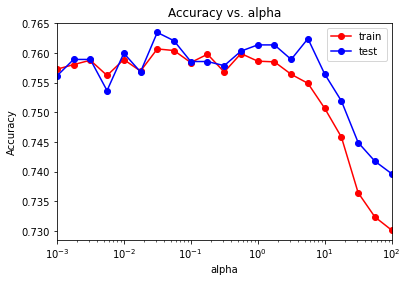

In [151]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend();

In [152]:
min_test_err = np.min(test_err)
print(min_test_err)

0.23651016117729504


In [153]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print(alpha_opt)

0.03162277660168379


In [154]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (optim_neurons,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.23929127725856697
0.23651016117729504


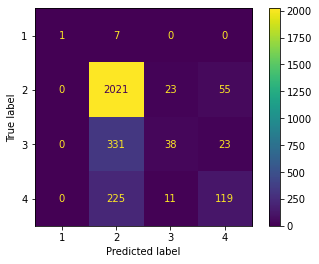

In [155]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp_model, X_test, y_test) 

In [156]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       1.00      0.12      0.22         8
           2       0.78      0.96      0.86      2099
           3       0.53      0.10      0.16       392
           4       0.60      0.34      0.43       355

    accuracy                           0.76      2854
   macro avg       0.73      0.38      0.42      2854
weighted avg       0.73      0.76      0.71      2854



### Two layers network

In [157]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,100),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42)

In [158]:
%%time
mlp_model.fit(X_train, y_train)

y_test_predict = mlp_model.predict(X_test)
err_train = np.mean(y_train != mlp_model.predict(X_train))
err_test = np.mean(y_test != y_test_predict)

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.24715732087227416 0.24351786965662228
[[   0    8    0    0]
 [   0 2036   10   53]
 [   0  350   21   21]
 [   0  249    4  102]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.77      0.97      0.86      2099
           3       0.60      0.05      0.10       392
           4       0.58      0.29      0.38       355

    accuracy                           0.76      2854
   macro avg       0.49      0.33      0.34      2854
weighted avg       0.72      0.76      0.69      2854

CPU times: user 2min 5s, sys: 44.8 s, total: 2min 50s
Wall time: 42.8 s


Подберем оптимальное количество нейронов в диапазоне [10, 120] с шагом 10.

In [160]:
test_err = []
train_err = []
train_acc = []
test_acc = []

for neurons in neurons_arr:
    print(neurons)
    mlp_model = MLPClassifier(
                          hidden_layer_sizes = (neurons, neurons),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42)
    mlp_model.fit(X_train, y_train)
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


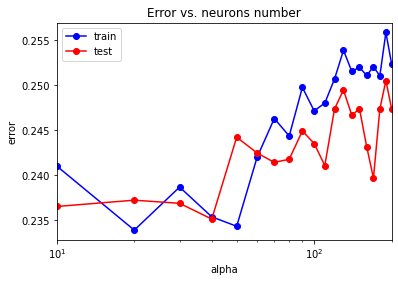

In [161]:
plt.semilogx(neurons_arr, train_err, 'b-o', label = 'train')
plt.semilogx(neurons_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(neurons_arr), np.max(neurons_arr)])
plt.title('Error vs. neurons number')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend();

In [162]:
optim_neurons = neurons_arr[np.argmin(test_err)]
print(optim_neurons)

40


Подберем оптимальное значение параметра $\alpha$ для алгоритма MLPClassifier из библиотеки sklearn в диапазоне [-3, 2] разделенные равномерно в логарифмическом масштабе.

In [163]:
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(
                          alpha=alpha,
                          hidden_layer_sizes = (optim_neurons, optim_neurons),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42)
    mlp_model.fit(X_train, y_train)
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

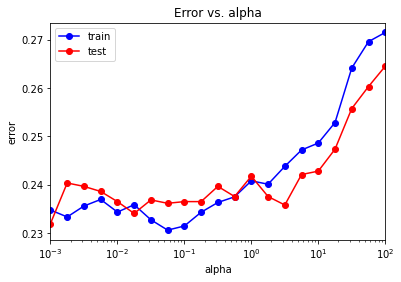

In [164]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend();

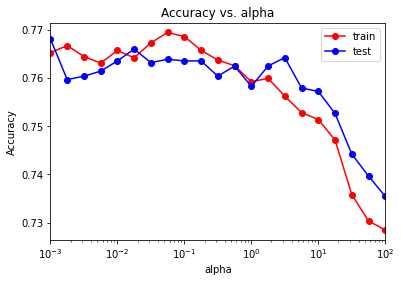

In [168]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend();

In [165]:
min_test_err = np.min(test_err)
print(min_test_err)

0.2319551506657323


In [166]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print(alpha_opt)

0.001


In [167]:
%%time
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (optim_neurons, optim_neurons),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.2347741433021807
0.2319551506657323
CPU times: user 53.5 s, sys: 15.1 s, total: 1min 8s
Wall time: 17.3 s


# Выводы:
В рамках данной работы:
- были получены навыки работы с multi-layer perceptron из библиотеки sklearn
- удалось достичь ошибки в 23.7% при использовании однослойной нейронной сети, что является хорошим результатом, но некоторые алгоритмы машинного обучения давали результаты лучше этого
- был получен результат, в котором время работы увеличивается, по сравнению с алгоритмом kNN, при этом точность увеличивается незначительно (примерно на 1-2%)
- была исследована зависимость от количества нейронов в слое. Оптимальный результат был достгнут при использовании 60 нейронов, при этом ошибка получилась минимальной
- был выполнен подбор гиперпараметра, оптимальное значение $\alpha$ в диапазоне [-3, 2] с выборкой 20 значений из данного интервала = 0.0316
- при использовании двухслойной нейронной сети результаты незначительно изменились, уналось получить выигрыша в 0.5%.: ошибка - 23.1% при оптимальном $\alpha$ = 0.001 и количестве нейронов 40 на каждом из двух слоев